Objective: Define the primary goal of your analysis. For instance, "To understand the relationship between environmental factors and human activity as recorded by IoT sensors."
Significance: Explain why this analysis is important, such as predicting environmental conditions, understanding human-environment interaction, or improving sensor deployment strategies.

In [11]:
import pandas as pd

# Assuming you have downloaded the dataset and it's in CSV format
file_path = 'iot_telemetry_data.csv'  # Replace with the actual file path

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

             ts             device        co   humidity  light       lpg  \
0  1.594512e+09  b8:27:eb:bf:9d:51  0.004956  51.000000  False  0.007651   
1  1.594512e+09  00:0f:00:70:91:0a  0.002840  76.000000  False  0.005114   
2  1.594512e+09  b8:27:eb:bf:9d:51  0.004976  50.900000  False  0.007673   
3  1.594512e+09  1c:bf:ce:15:ec:4d  0.004403  76.800003   True  0.007023   
4  1.594512e+09  b8:27:eb:bf:9d:51  0.004967  50.900000  False  0.007664   

   motion     smoke       temp  
0   False  0.020411  22.700000  
1   False  0.013275  19.700001  
2   False  0.020475  22.600000  
3   False  0.018628  27.000000  
4   False  0.020448  22.600000  


In [12]:
# Basic information about the dataset
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ts        405184 non-null  float64
 1   device    405184 non-null  object 
 2   co        405184 non-null  float64
 3   humidity  405184 non-null  float64
 4   light     405184 non-null  bool   
 5   lpg       405184 non-null  float64
 6   motion    405184 non-null  bool   
 7   smoke     405184 non-null  float64
 8   temp      405184 non-null  float64
dtypes: bool(2), float64(6), object(1)
memory usage: 22.4+ MB


In [13]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
ts          0
device      0
co          0
humidity    0
light       0
lpg         0
motion      0
smoke       0
temp        0
dtype: int64


Since the 'light' and 'motion' columns are boolean, we transform them into 0 and 1.

In [14]:
# Transforming boolean columns 'light' and 'motion' into integers
data['light'] = data['light'].astype(int)
data['motion'] = data['motion'].astype(int)

# convert unix time to time of day
from datetime import datetime, timedelta
start = datetime(1970, 1, 1)  # Unix epoch start time
data['datetime'] = data.ts.apply(lambda x: start + timedelta(seconds=x))

# Convert the 'datetime' column to a datetime object, and make datetime column into index column for convenience
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)
data.head(5)

,ts,device,co,humidity,light,lpg,motion,smoke,temp
datetime,,,,,,,,,
2020-07-12 00:01:34.385975,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,0,0.007651,0,0.020411,22.700000
2020-07-12 00:01:34.735568,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,0,0.005114,0,0.013275,19.700001
2020-07-12 00:01:38.073573,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,0,0.007673,0,0.020475,22.600000
2020-07-12 00:01:39.589146,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,1,0.007023,0,0.018628,27.000000
2020-07-12 00:01:41.761235,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,0,0.007664,0,0.020448,22.600000


In [15]:
# Grouping data by 'device' and creating a separate DataFrame for each device
device_groups = data.groupby('device')

# Dictionary to store each device's DataFrame
device_dataframes = {}

for device, group in device_groups:
    device_dataframes[device] = group

device_dataframes

{'00:0f:00:70:91:0a':                                       ts             device        co  \
 datetime                                                                
 2020-07-12 00:01:34.735568  1.594512e+09  00:0f:00:70:91:0a  0.002840   
 2020-07-12 00:01:46.869076  1.594512e+09  00:0f:00:70:91:0a  0.002938   
 2020-07-12 00:02:02.785732  1.594512e+09  00:0f:00:70:91:0a  0.002905   
 2020-07-12 00:02:11.476376  1.594512e+09  00:0f:00:70:91:0a  0.002938   
 2020-07-12 00:02:15.289086  1.594512e+09  00:0f:00:70:91:0a  0.002840   
 ...                                  ...                ...       ...   
 2020-07-20 00:03:16.329782  1.595203e+09  00:0f:00:70:91:0a  0.003745   
 2020-07-20 00:03:20.684223  1.595203e+09  00:0f:00:70:91:0a  0.003745   
 2020-07-20 00:03:25.039890  1.595203e+09  00:0f:00:70:91:0a  0.003745   
 2020-07-20 00:03:33.162015  1.595203e+09  00:0f:00:70:91:0a  0.003745   
 2020-07-20 00:03:36.979522  1.595203e+09  00:0f:00:70:91:0a  0.003745   
 
               

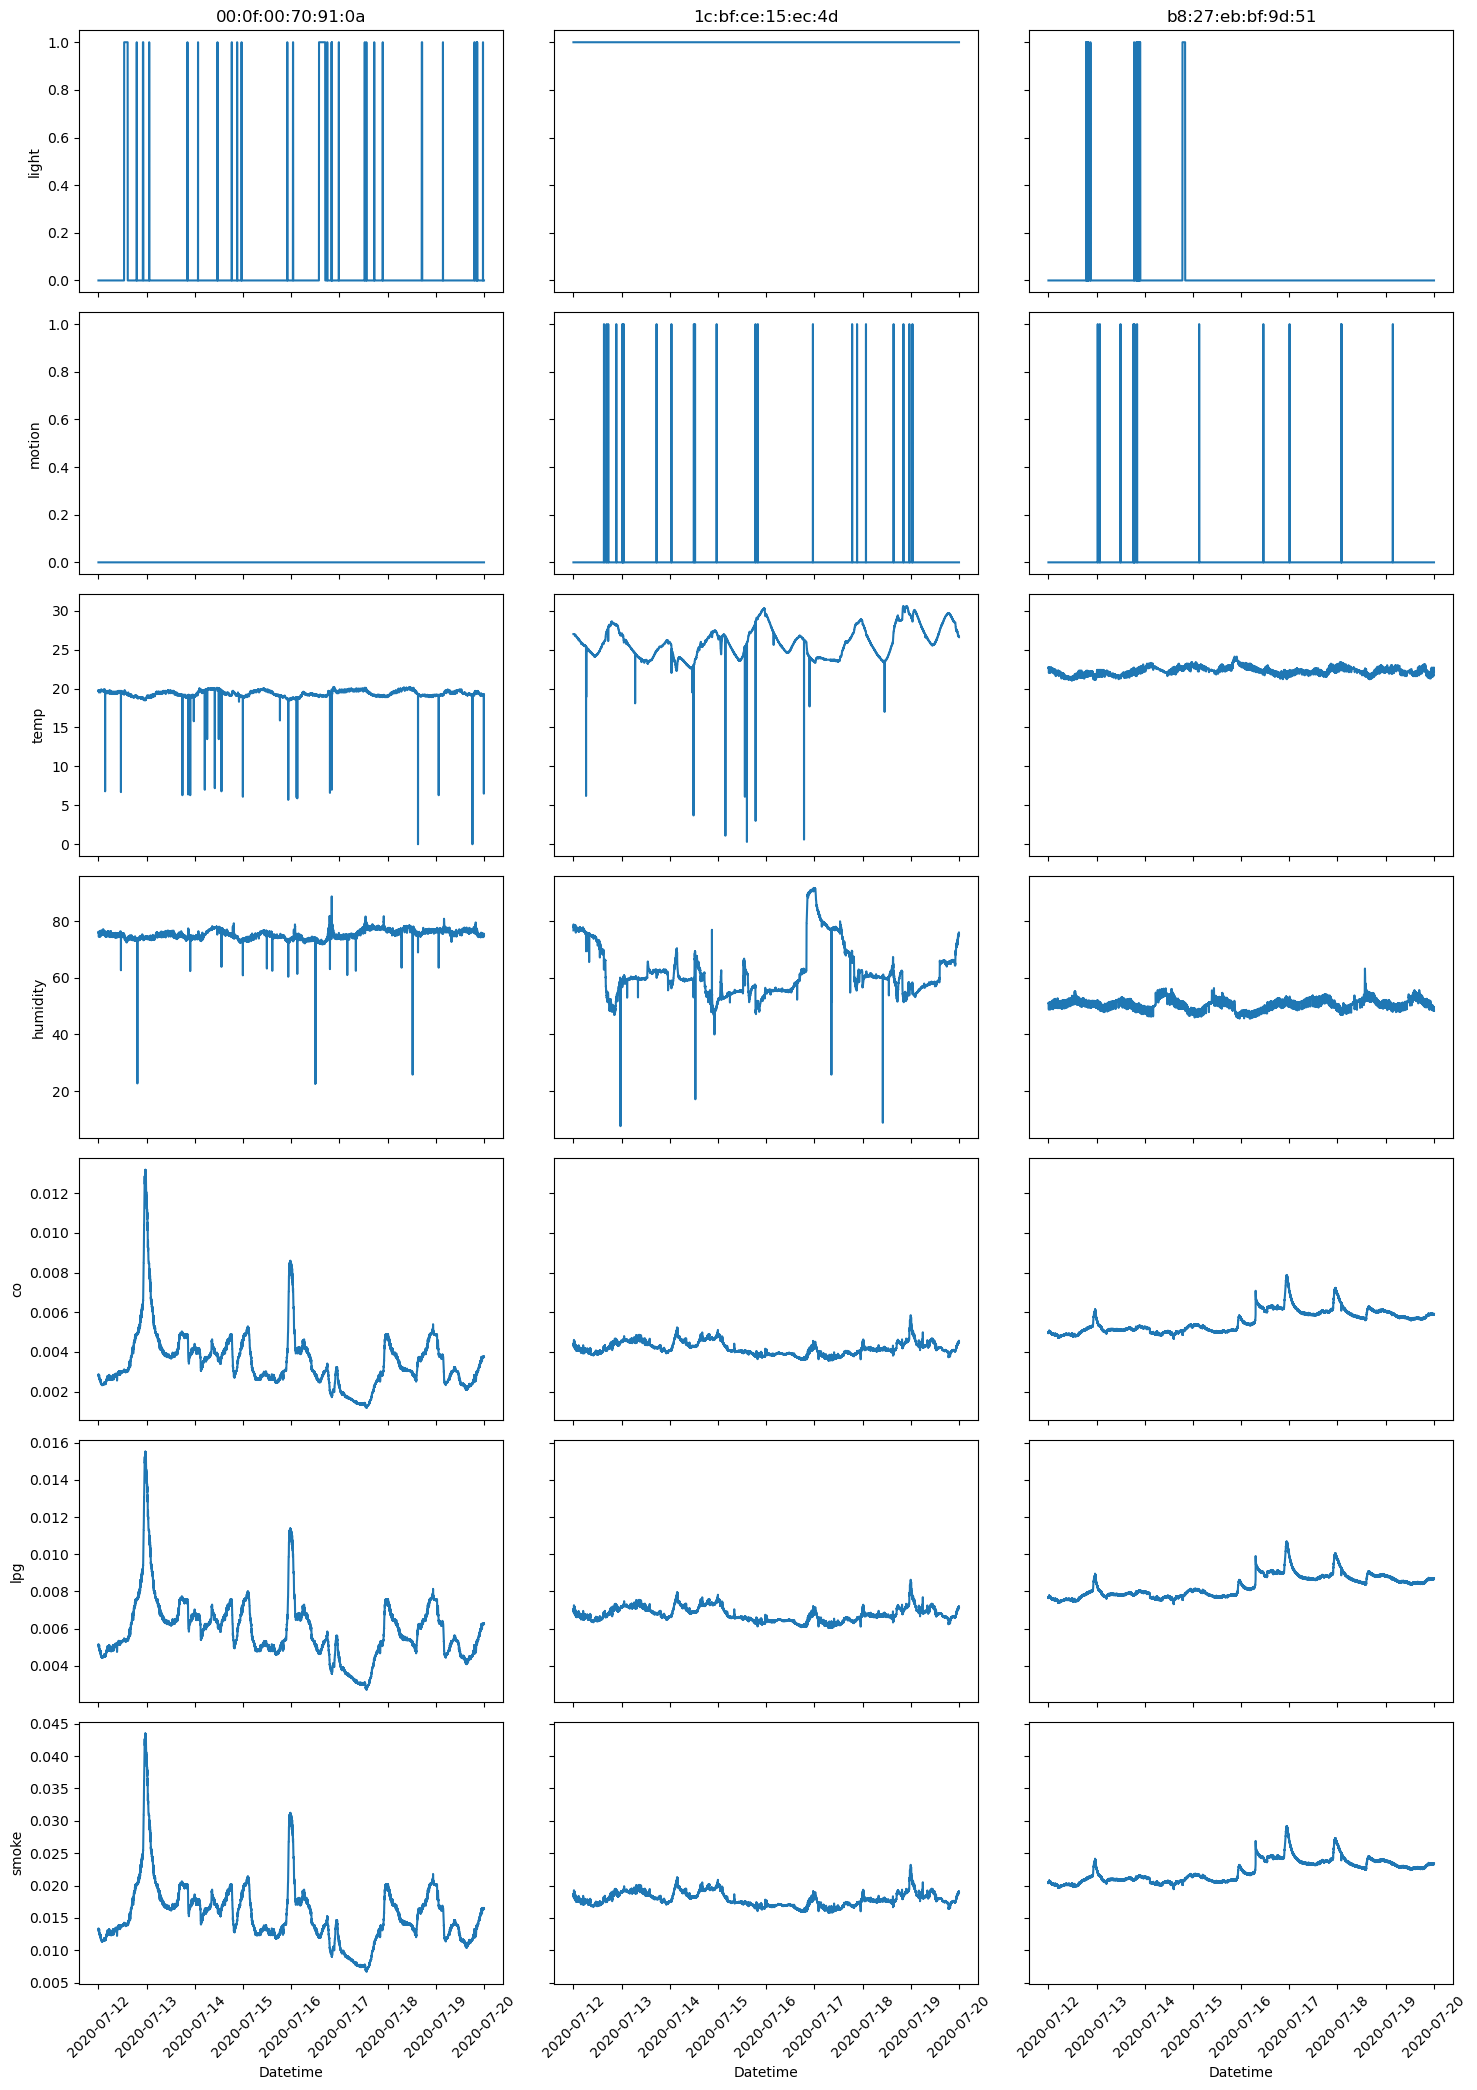

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_device_sensors(device_dataframes, undersample_rate=1):
    """
    Plot sensor data for each device with aligned axes.

    Args:
    - device_dataframes (dict): Dictionary with device IDs as keys and DataFrames as values.
    - undersample_rate (int): Rate at which to undersample the data for plotting efficiency. Default is 1 (no undersampling).
    """

    # Sensors in the desired order
    sensors = ['light', 'motion', 'temp', 'humidity', 'co', 'lpg', 'smoke']

    # Number of devices and sensors
    num_devices = len(device_dataframes)
    num_sensors = len(sensors)

    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=num_sensors, ncols=num_devices, figsize=(num_devices * 5, num_sensors * 3), sharex='col', sharey='row')

    # Iterate through each device and sensor
    for j, (device_id, df) in enumerate(device_dataframes.items()):
        # Undersample the data
        df_undersampled = df.iloc[::undersample_rate, :]

        for i, sensor in enumerate(sensors):
            # Plot each sensor in a separate subplot
            sns.lineplot(data=df_undersampled, x=df_undersampled.index, y=sensor, ax=axes[i, j])
            axes[i, j].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

            # Set x and y labels
            if j == 0:  # Only set y-axis label for the first column
                axes[i, j].set_ylabel(sensor)
            if i == num_sensors - 1:  # Only set x-axis label for the bottom row
                axes[i, j].set_xlabel('Datetime')
            else:
                axes[i, j].set_xlabel('')

            # Set titles for the first row and first column
            if i == 0:
                axes[i, j].set_title(device_id)

    plt.tight_layout()
    plt.show()

# Example usage
plot_device_sensors(device_dataframes, undersample_rate=10)  # Adjust undersample_rate as needed


Consistent with the dataset description, it is clear that the three devices locate at distinct environments with different temperature, humidity, lighting, and human activity.

Device 00 detects light regularly, however with sparse motion readout. The environment is cool and humid.
Device 1c detects constant light, with regualar motion readout. The temperature and humidity have a large variation.
Device b8 detects three epoches of light at the first few days and silent at the rest, with regular motion readout. The environment is warm and the least humid.

Interestingly, CO, lpg, and smoke readout are highly correlated, we plot the correlation matrix to verify this observation.

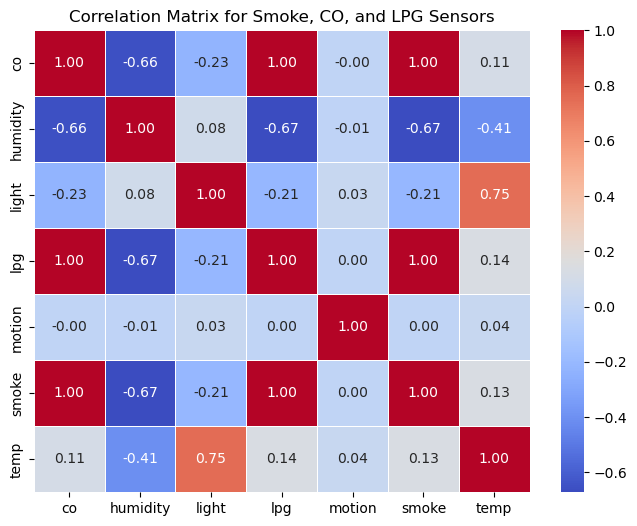

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the sensor column
corr_data = data.drop(['ts','device'],axis=1)

# Compute the correlation matrix
corr_matrix = corr_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Smoke, CO, and LPG Sensors')
plt.show()


The strong correlation is verified, so we remove lpg and smoke as they do not provide new information.

In [18]:
# Remove lpg and smoke, ts also because we have datetime now
dataCleaned = data.drop(['ts','lpg','smoke'],axis=1)

dataCleaned.head(10)

,device,co,humidity,light,motion,temp
datetime,,,,,,
2020-07-12 00:01:34.385975,b8:27:eb:bf:9d:51,0.004956,51.000000,0,0,22.700000
2020-07-12 00:01:34.735568,00:0f:00:70:91:0a,0.002840,76.000000,0,0,19.700001
2020-07-12 00:01:38.073573,b8:27:eb:bf:9d:51,0.004976,50.900000,0,0,22.600000
2020-07-12 00:01:39.589146,1c:bf:ce:15:ec:4d,0.004403,76.800003,1,0,27.000000
2020-07-12 00:01:41.761235,b8:27:eb:bf:9d:51,0.004967,50.900000,0,0,22.600000
2020-07-12 00:01:44.468411,1c:bf:ce:15:ec:4d,0.004391,77.900002,1,0,27.000000
2020-07-12 00:01:45.448864,b8:27:eb:bf:9d:51,0.004976,50.900000,0,0,22.600000
2020-07-12 00:01:46.869076,00:0f:00:70:91:0a,0.002938,76.000000,0,0,19.700001
2020-07-12 00:01:48.275382,1c:bf:ce:15:ec:4d,0.004345,77.900002,1,0,27.000000


The third device seems to be the most interesting as it receives constant light and regular human motion featuring a periodic temperature cycle. Assuming the sudden jumps in temperature and humidity readout are caused by random mechanical perturbation, we are going to treat those peaks as outliers and smooth them out using moving average.

Moreover, the motion sensor readout are epochs that are not easy to quantify intensity, so we are going to set a bin can count the epoches frequency like people do in neuroscience, that is, we measure the firing rate.

Let's plot the daily variation of these three sensors for the third device.